In [1]:
import numpy as np
import pandas as pd

In [2]:
ur1 = pd.read_csv("user_rating_0_to_1000.csv")
ur2 = pd.read_csv("user_rating_1000_to_2000.csv")
ur3 = pd.read_csv("user_rating_2000_to_3000.csv")
ur4 = pd.read_csv("user_rating_3000_to_4000.csv")
ur5 = pd.read_csv("user_rating_4000_to_5000.csv")
ur6 = pd.read_csv("user_rating_5000_to_6000.csv")
ur7 = pd.read_csv("user_rating_6000_to_11000.csv")


In [3]:
users = pd.concat([ur1,ur2,ur3,ur4,ur5,ur6,ur7])
urc = users.copy()

In [4]:
users.head()

,ID,Name,Rating
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing
2,1,Siddhartha,it was amazing
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it
4,1,"Ready Player One (Ready Player One, #1)",really liked it


In [5]:
users.shape

(362596, 3)

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362596 entries, 0 to 127677
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      362596 non-null  int64 
 1   Name    362596 non-null  object
 2   Rating  362596 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.1+ MB


In [7]:
users.isna()

,ID,Name,Rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
127673,False,False,False
127674,False,False,False
127675,False,False,False
127676,False,False,False


In [8]:
users.isna().sum()

ID        0
Name      0
Rating    0
dtype: int64

In [9]:
users.describe()

,ID
count,362596.000000
mean,4910.988726
std,3261.676702
min,1.000000
25%,1982.000000
50%,4544.000000
75%,7777.000000
max,10999.000000


In [10]:
users.sample

<bound method NDFrame.sample of            ID                                               Name  \
0           1  Agile Web Development with Rails: A Pragmatic ...   
1           1  The Restaurant at the End of the Universe (Hit...   
2           1                                         Siddhartha   
3           1  The Clock of the Long Now: Time and Responsibi...   
4           1            Ready Player One (Ready Player One, #1)   
...       ...                                                ...   
127673  10978  The Foundation: A Great American Secret: How P...   
127674  10986              Cosette: The Sequel to Les Miserables   
127675  10986            J. D. Salinger's The Catcher in the Rye   
127676  10988  Facing the Lion: Growing Up Maasai on the Afri...   
127677  10988                                      Homeless Bird   

                 Rating  
0        it was amazing  
1        it was amazing  
2        it was amazing  
3       really liked it  
4       really liked 

In [11]:
users.head()

,ID,Name,Rating
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing
2,1,Siddhartha,it was amazing
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it
4,1,"Ready Player One (Ready Player One, #1)",really liked it


In [12]:
users.sample(10)

,ID,Name,Rating
33541,617,Ethan Frome,really liked it
70311,7809,گزارش یک مرگ,it was amazing
56221,6845,Thinking Like an Economist: A Guide to Rationa...,it was amazing
99995,8261,In the Heart of the Amazon Forest,really liked it
22835,8919,Memoirs of a Geisha,liked it
3860,73,jQuery in Action,it was ok
86439,7496,"The Golden Ratio: The Story of Phi, the World'...",it was amazing
100115,9702,شوهر آهو خانم,it was ok
3282,2137,سال بلوا,it was amazing
13456,5671,Guests on Earth,it was ok


In [13]:
users['Rating'].value_counts()

really liked it                      132808
liked it                              96047
it was amazing                        92354
it was ok                             28811
did not like it                        7811
This user doesn't have any rating      4765
Name: Rating, dtype: int64

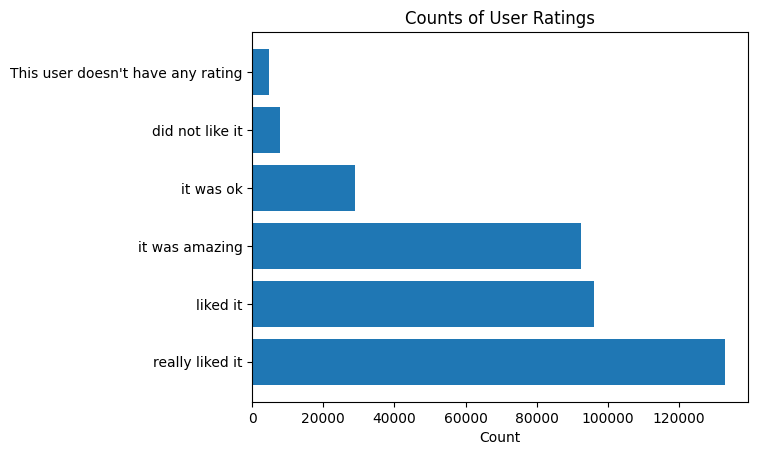

In [14]:
import matplotlib.pyplot as plt

# Create a dictionary of the rating counts
rating_counts = {
    'really liked it': 132808,
    'liked it': 96047,
    'it was amazing': 92354,
    'it was ok': 28811,
    'did not like it': 7811,
    "This user doesn't have any rating": 4765
}

# Create a horizontal bar graph using matplotlib
plt.barh(list(rating_counts.keys()), list(rating_counts.values()))
plt.xlabel('Count')
plt.title('Counts of User Ratings')
plt.show()


In [15]:
users.head()

,ID,Name,Rating
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing
2,1,Siddhartha,it was amazing
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it
4,1,"Ready Player One (Ready Player One, #1)",really liked it


In [16]:
users.rename({"Rating":"User Rating","Name":"Book"},inplace =True,axis =1)

In [17]:
users.head()

,ID,Book,User Rating
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing
2,1,Siddhartha,it was amazing
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it
4,1,"Ready Player One (Ready Player One, #1)",really liked it


In [18]:
users['User Rating'].isna().sum()

0

In [19]:
users.fillna(0, inplace=True)

In [20]:
users[users['User Rating'] =='NaN']

,ID,Book,User Rating


In [21]:
users['User Rating'].unique()

array(['it was amazing', 'really liked it', 'liked it', 'did not like it',
       'it was ok', "This user doesn't have any rating"], dtype=object)

In [22]:
rating_dict = {'it was amazing': 5, 'really liked it': 4, 'liked it': 3, 'it was ok': 2, 'did not like it': 1,"This user doesn't have any rating": 0}


In [23]:
users['User Rating'] = users['User Rating'].replace(rating_dict)

In [24]:
users.head()

,ID,Book,User Rating
0,1,Agile Web Development with Rails: A Pragmatic ...,5
1,1,The Restaurant at the End of the Universe (Hit...,5
2,1,Siddhartha,5
3,1,The Clock of the Long Now: Time and Responsibi...,4
4,1,"Ready Player One (Ready Player One, #1)",4


In [25]:
users['User Rating'].value_counts()

4    132808
3     96047
5     92354
2     28811
1      7811
0      4765
Name: User Rating, dtype: int64

In [26]:
users[users['Book'].isna()]

,ID,Book,User Rating


In [27]:
users.shape

(362596, 3)

In [28]:
users.drop_duplicates(keep='first',inplace=True)

In [29]:
users.shape

(362161, 3)

In [30]:
users.to_csv("rating_clean.csv",index=False)